<a href="https://colab.research.google.com/github/akitim/SkillFactory_current/blob/main/Unit_2_EDA_Chocolate_bars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocess

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
 
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
 
import sys
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
sys.path.clear
sys.path.append('/content/gdrive/MyDrive/SkillFactory')
 
#def contains_letters(s):
#    ls = "q w e r t y u i o p a s d f g h j k l z x c v b n m Q W E R T Y U I O P A S D F G H J K L Z X C V B N M".split(' ')
#cacao = pd.read_csv('/content/gdrive/MyDrive/SkillFactory/cacao_flavors.csv')

Mounted at /content/gdrive


In [3]:
cacao = pd.read_csv('/content/gdrive/MyDrive/SkillFactory/cacao_flavors.csv')
cacao.columns = ['bar_id','company','specific_origin','ref','review_date','cocoa_percent','company_location','rating','bean_type','bean_origin']
cacao.sample()

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
1617,1618,Tan Ban Skrati,"Paramaribo, batch 20160043-01",1868,2016,70%,Suriname,3.25,Trinitario,Suriname


#bar_id

Number of unique bar_id's: 1795


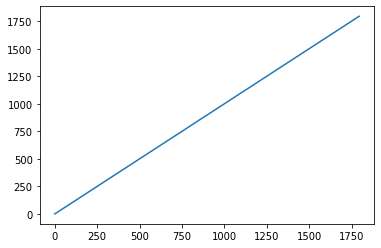

In [ ]:
 print(f"Number of unique bar_id's: {cacao.bar_id.nunique()}")
plt.plot(cacao.bar_id)

In [ ]:
cacao.drop(['bar_id'], inplace = True, axis = 1)
cacao.sample()

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
1762,Zak's,"Dominican Republic, Batch D2",1578,2015,70%,U.S.A.,3.25,,Domincan Republic


#Задание 2.3.1

In [ ]:
print (f"Number of companies in the dataset + empty: {cacao.company.nunique()}")
 
cacao[cacao.company.apply (lambda x: not(isalpha(x)))

Number of companies in dataset + empty: 408


,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
8,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
16,,Papua New Guinea,1015,2013,70%,France,3.25,,Papua New Guinea
67,,"LamasdelChanka, San Martin, Oro Verde coop",1145,2013,72%,Peru,3.25,,Peru
78,,Chuao,111,2007,70%,Italy,5.00,Trinitario,Venezuela
108,,Phantom,1924,2016,70%,U.S.A.,4.00,Forastero (Nacional),Peru
116,,Maya Mountain,1598,2015,70%,U.S.A.,3.75,Trinitario,Belize
131,,Java,355,2009,72%,U.K.,2.75,Trinitario,Indonesia
134,,Peru,363,2009,75%,U.K.,3.00,Criollo,Peru
135,,Dominican Republic,363,2009,72%,U.K.,3.25,Trinitario,Dominican Republic
143,,San Jose del Tambo,175,2007,70%,U.S.A.,3.00,Forastero (Arriba),Ecuador


In [ ]:
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)
cacao[cacao.company.apply (lambda x: not(isalpha(x)))

In [ ]:
display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())
cacao.loc[:, ['company']].info()
cacao.loc[:, ['company']]

,company
Soma,45
Fresco,26
Bonnat,26
Pralus,25
Domori,22
...,...
Cacao Arabuco,1
The Barn,1
Mayacama,1
Jordis,1


Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1696 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


#Задание 2.3.2

In [ ]:
valid_bo = cacao[cacao.bean_origin.apply(isalpha)
 
print (f"Number of origins in the dataset: {valid_bo.bean_origin.nunique()}")

Задание 2.3.3

In [ ]:
display(pd.DataFrame(cacao.bean_origins.value_counts())